In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)


In [4]:
def generate_sweeping_waypoints(cell_origin, num_rows, num_cols, up_steps, right_left_steps):
    waypoints = []

    for row in range(num_rows):
        if row % 2 == 0:
            # Move from left to right
            for col in range(num_cols):
                x = cell_origin[0] + col * right_left_steps   # Horizontal Motion
                x = round(x, 2)
                y = cell_origin[1] + row * up_steps           # Vertical Motion
                y = round(y, 2)
                waypoints.append((x, y))
        else:
            # Move from right to left
            for col in range(num_cols - 1, -1, -1):
                x = cell_origin[0] + col * right_left_steps   # Horizontal Motion
                x = round(x, 2)
                y = cell_origin[1] + row * up_steps           # Vertical Motion
                y = round(y, 2)
                waypoints.append((x, y))

    return waypoints

def calculate_orientation(current_point, next_point):
    # Calculate orientation (theta) based on the difference in coordinates
    delta_x = next_point[0] - current_point[0]
    delta_y = next_point[1] - current_point[1]
    orientation = np.arctan2(delta_y, delta_x)
    
    return orientation

def get_waypoints_with_orientation(waypoints):

    waypoints_with_orientation = []
    # waypoints_with_orientation.append([waypoints[0][0], waypoints[0][1], 0.0])

    for i in range(len(waypoints) - 1):
        current_point = waypoints[i]
        next_point = waypoints[i + 1]
        
        # Calculate orientation for the current pair
        orientation = calculate_orientation(current_point, next_point)
        
        # Append [x, y, theta] to the new list
        waypoints_with_orientation.append([current_point[0], current_point[1], orientation])

    # Add the last waypoint with orientation
    waypoints_with_orientation.append([waypoints[-1][0], waypoints[-1][1], 0.0])  # Assuming 0.0 as default orientation

    return waypoints_with_orientation


def get_robot_waypoints(waypoints_with_orientation):
    path_robot = []
    for i in range(len(waypoints_with_orientation)-1):
        # print(i)
        path_robot.append([waypoints_with_orientation[i][0], waypoints_with_orientation[i][1], waypoints_with_orientation[i][2]])

        if(abs(waypoints_with_orientation[i][2]-waypoints_with_orientation[i+1][2]) > 0.1):
            path_robot.append([waypoints_with_orientation[i+1][0], waypoints_with_orientation[i+1][1], waypoints_with_orientation[i][2]])

    n = len(waypoints_with_orientation)-1
    path_robot.append([waypoints_with_orientation[n][0], waypoints_with_orientation[n][1], waypoints_with_orientation[n][2]])

    return path_robot


def obstacle_between_points(box_vertices, point1, point2):
    # Get the bounding box of the given vertices
    min_x = min(v[0] for v in box_vertices)
    max_x = max(v[0] for v in box_vertices)
    min_y = min(v[1] for v in box_vertices)
    max_y = max(v[1] for v in box_vertices)

    # Check if the bounding box is between the two points
    return (
        min_x >= min(point1[0], point2[0]) and
        max_x <= max(point1[0], point2[0]) and
        min_y >= min(point1[1], point2[1]) and
        max_y <= max(point1[1], point2[1])
    )


def get_waypoints_with_obstacle_avoidance(waypoints, obstacles):
    waypoints_with_avoidance = []

    for i in range(len(waypoints) - 1):
        current_point = waypoints[i]
        next_point = waypoints[i + 1]

        # Check for obstacles between current and next point
        obstacle_identified = obstacle_between_points(current_point,next_point)

        if obstacle_identified:
            #call astar function to get the shortest path with obstacle and add the 
            waypoints_with_avoidance.extend(current_point)

        else:
            # If no obstacle-free path found, use the original next point
            waypoints_with_avoidance.append(next_point)

    # Add the last waypoint
    waypoints_with_avoidance.append(waypoints[-1])

    return waypoints_with_avoidance


In [15]:

# Example usage:
cell_origin = (0, 0)
grid_size = 1
up_steps = 0.1
right_left_steps = 1.0
num_rows = int((grid_size/up_steps)) + 1
num_cols = int(grid_size/right_left_steps) + 1

waypoints = generate_sweeping_waypoints(cell_origin, num_rows, num_cols, up_steps, right_left_steps)
waypoints = np.array(waypoints)

waypoints_with_orientation = get_waypoints_with_orientation(waypoints)
waypoints_with_orientation = np.array(waypoints_with_orientation)

print(waypoints_with_orientation[:,:2])


[[0.  0. ]
 [1.  0. ]
 [1.  0.1]
 [0.  0.1]
 [0.  0.2]
 [1.  0.2]
 [1.  0.3]
 [0.  0.3]
 [0.  0.4]
 [1.  0.4]
 [1.  0.5]
 [0.  0.5]
 [0.  0.6]
 [1.  0.6]
 [1.  0.7]
 [0.  0.7]
 [0.  0.8]
 [1.  0.8]
 [1.  0.9]
 [0.  0.9]
 [0.  1. ]
 [1.  1. ]]


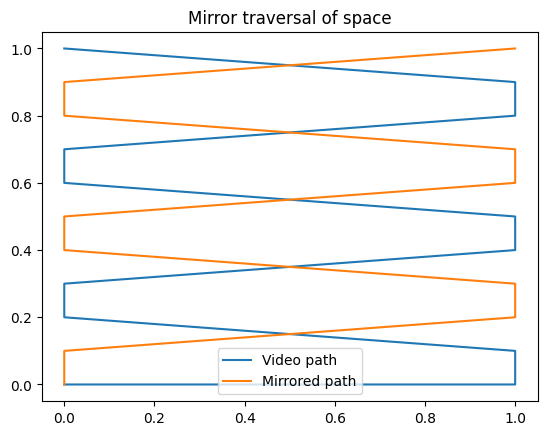

In [42]:
example_points = np.array([[0.  ,0. ],
                            [1. , 0. ],
                            [1. , 0.2],
                            [0. , 0.2],
                            [0. , 0.4],
                            [1. , 0.4],
                            [1. , 0.6],
                            [0. , 0.6],
                            [0. , 0.8],
                            [1. , 0.8],
                            [1. , 1. ],
                            [0. , 1. ]])
ideal_points = np.array([[0.,  0. ],
                        [1. , 0. ],
                        [1. , 0.1],
                        [0. , 0.1],
                        [0. , 0.2],
                        [1. , 0.2],
                        [1. , 0.3],
                        [0. , 0.3],
                        [0. , 0.4],
                        [1. , 0.4],
                        [1. , 0.5],
                        [0. , 0.5],
                        [0. , 0.6],
                        [1. , 0.6],
                        [1. , 0.7],
                        [0. , 0.7],
                        [0. , 0.8],
                        [1. , 0.8],
                        [1. , 0.9],
                        [0. , 0.9],
                        [0. , 1. ],
                        [1. , 1. ]])
example_points_slope = np.array([[0.  ,0. ],
                                [1. , 0. ],
                                [1. , 0.1],
                                [0. , 0.2],
                                [0. , 0.3],
                                [1. , 0.4],
                                [1. , 0.5],
                                [0. , 0.6],
                                [0. , 0.7],
                                [1. , 0.8],
                                [1. , 0.9 ],
                                [0. , 1. ]])
example_points_slope_mirror = np.array([[1. , 1. ],
                                        [0. , 0.9],
                                        [0. , 0.8],
                                        [1. , 0.7],
                                        [1. , 0.6],
                                        [0. , 0.5],
                                        [0. , 0.4],
                                        [1. , 0.3],
                                        [1. , 0.2],
                                        [0. , 0.1],
                                        [0. , 0. ]])
example_points_slope_mirror2 = np.array([[0. , 1. ],
                                        [1. , 1.0],
                                        [1. , 0.9],
                                        [0. , 0.8],
                                        [0. , 0.7],
                                        [1. , 0.6],
                                        [1. , 0.5],
                                        [0. , 0.4],
                                        [0. , 0.3],
                                        [1. , 0.2],
                                        [1. , 0.1],
                                        [0. , 0. ]])
# plt.plot(example_points[:, 0], example_points[:, 1])
plt.plot(example_points_slope[:, 0], example_points_slope[:, 1], label="Video path")
plt.plot(example_points_slope_mirror[:, 0], example_points_slope_mirror[:, 1], label="Mirrored path")
# plt.plot(example_points_slope_mirror2[:, 0], example_points_slope_mirror2[:, 1], label="Reversed path")
plt.legend()
plt.title("Mirror traversal of space")
plt.savefig("two_traversals.png")

In [21]:
np.array(list(reversed(example_points_slope)))

array([[0. , 1. ],
       [1. , 0.9],
       [1. , 0.8],
       [0. , 0.7],
       [0. , 0.6],
       [1. , 0.5],
       [1. , 0.4],
       [0. , 0.3],
       [0. , 0.2],
       [1. , 0.1],
       [1. , 0. ],
       [0. , 0. ]])